<a href="https://colab.research.google.com/github/sweetyjunnarkar/News_topic_modeling/blob/main/Sweety_Junnarkar_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
News=[]
Type=[]
path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Topic Modeling on News Article/Copy of bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read().decode(errors='replace')
        News.append(data)
        Type.append(i)

data={'news':News,'type':Type}
df = pd.DataFrame(data)

In [ ]:
df.head()

,news,type
0,HealthSouth ex-boss goes on trial\n\nThe forme...,business
1,Aids and climate top Davos agenda\n\nClimate c...,business
2,Euro firms miss out on optimism\n\nMore than 9...,business
3,UK economy ends year with spurt\n\nThe UK econ...,business
4,China now top trader with Japan\n\nChina overt...,business


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.shape

(2225, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


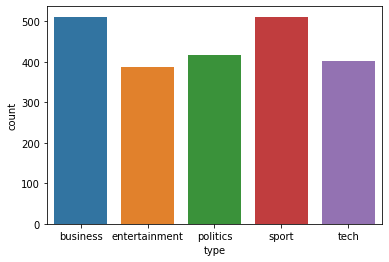

In [ ]:
sns.countplot(df.type)

In [ ]:
news_df=df.copy()

In [ ]:
news_df.head()

,news,type
0,HealthSouth ex-boss goes on trial\n\nThe forme...,business
1,Aids and climate top Davos agenda\n\nClimate c...,business
2,Euro firms miss out on optimism\n\nMore than 9...,business
3,UK economy ends year with spurt\n\nThe UK econ...,business
4,China now top trader with Japan\n\nChina overt...,business


In [ ]:
new=news_df['news'][0]
new

'HealthSouth ex-boss goes on trial\n\nThe former head of US medical services firm HealthSouth overstated earnings and assets to boost the company\'s share price, it was claimed in court.\n\nRichard Scrushy, 52, is accused of "directing" a $2.7bn (£1.4bn) accounting fraud at the company he co-founded in Alabama in 1984. Prosecutors said he was motivated by wealth - spending about $200m between 1996 and 2002 while earning much less. Defence lawyers said Mr Scrushy had been deceived by other executives. Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against Mr Scrushy.\n\n"We will present evidence that Richard Scrushy knew about the conspiracy, that he participated in the conspiracy and that he profited," prosecutor Alice Martin told the court. Mr Scrushy is the first chief executive to be tried for breaching the Sarbanes Oxley Act - a law introduced in the wake of the Enron and WorldCom frauds which obliges corporate bosses to 

In [ ]:
new[0:]

'HealthSouth ex-boss goes on trial\n\nThe former head of US medical services firm HealthSouth overstated earnings and assets to boost the company\'s share price, it was claimed in court.\n\nRichard Scrushy, 52, is accused of "directing" a $2.7bn (£1.4bn) accounting fraud at the company he co-founded in Alabama in 1984. Prosecutors said he was motivated by wealth - spending about $200m between 1996 and 2002 while earning much less. Defence lawyers said Mr Scrushy had been deceived by other executives. Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against Mr Scrushy.\n\n"We will present evidence that Richard Scrushy knew about the conspiracy, that he participated in the conspiracy and that he profited," prosecutor Alice Martin told the court. Mr Scrushy is the first chief executive to be tried for breaching the Sarbanes Oxley Act - a law introduced in the wake of the Enron and WorldCom frauds which obliges corporate bosses to 

In [ ]:
news_df['news']=news_df['news'].astype('str')

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
news_df["filtered"] = news_df['news'].apply(remove_punctuations)

In [ ]:
news_df

,news,type,filtered
0,HealthSouth ex-boss goes on trial\n\nThe forme...,business,HealthSouth exboss goes on trial\n\nThe former...
1,Aids and climate top Davos agenda\n\nClimate c...,business,Aids and climate top Davos agenda\n\nClimate c...
2,Euro firms miss out on optimism\n\nMore than 9...,business,Euro firms miss out on optimism\n\nMore than 9...
3,UK economy ends year with spurt\n\nThe UK econ...,business,UK economy ends year with spurt\n\nThe UK econ...
4,China now top trader with Japan\n\nChina overt...,business,China now top trader with Japan\n\nChina overt...
...,...,...,...
2220,Microsoft debuts security tools\n\nMicrosoft i...,tech,Microsoft debuts security tools\n\nMicrosoft i...
2221,Europe backs digital TV lifestyle\n\nHow peopl...,tech,Europe backs digital TV lifestyle\n\nHow peopl...
2222,A decade of good website design\n\nThe web loo...,tech,A decade of good website design\n\nThe web loo...
2223,Doors open at biggest gadget fair\n\nThousands...,tech,Doors open at biggest gadget fair\n\nThousands...


In [ ]:
news_df.replace({ r'\A\s+|\s+\Z': '', '\n' : ' ','\\n':' '}, regex=True, inplace=True)

In [ ]:
news_df['filtered'][0]

'HealthSouth exboss goes on trial  The former head of US medical services firm HealthSouth overstated earnings and assets to boost the companys share price it was claimed in court  Richard Scrushy 52 is accused of directing a 27bn £14bn accounting fraud at the company he cofounded in Alabama in 1984 Prosecutors said he was motivated by wealth  spending about 200m between 1996 and 2002 while earning much less Defence lawyers said Mr Scrushy had been deceived by other executives Several former HealthSouth employees have already pleaded guilty to fraud and are expected to give evidence against Mr Scrushy  We will present evidence that Richard Scrushy knew about the conspiracy that he participated in the conspiracy and that he profited prosecutor Alice Martin told the court Mr Scrushy is the first chief executive to be tried for breaching the Sarbanes Oxley Act  a law introduced in the wake of the Enron and WorldCom frauds which obliges corporate bosses to vouch for the accuracy of their c

In [ ]:
import re
def rm_dig(news):
  a=[]
  for word in news.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [ ]:
news_df['filtered']=news_df['filtered'].apply(rm_dig)

In [ ]:
news_df

,news,type,filtered
0,HealthSouth ex-boss goes on trial The former ...,business,HealthSouth exboss goes on trial The former he...
1,Aids and climate top Davos agenda Climate cha...,business,Aids and climate top Davos agenda Climate chan...
2,Euro firms miss out on optimism More than 90%...,business,Euro firms miss out on optimism More than of ...
3,UK economy ends year with spurt The UK econom...,business,UK economy ends year with spurt The UK economy...
4,China now top trader with Japan China overtoo...,business,China now top trader with Japan China overtook...
...,...,...,...
2220,Microsoft debuts security tools Microsoft is ...,tech,Microsoft debuts security tools Microsoft is r...
2221,Europe backs digital TV lifestyle How people ...,tech,Europe backs digital TV lifestyle How people r...
2222,A decade of good website design The web looks...,tech,A decade of good website design The web looks ...
2223,Doors open at biggest gadget fair Thousands o...,tech,Doors open at biggest gadget fair Thousands of...


In [ ]:
def rm_sw(news):
  a= []
  sw = stopwords.words('english')
  sw1=['would','could','say','mr','year','also']
  sw.extend(sw1)
  for word in news.lower().split():
    if word not in sw:
      a.append(word)
  return ' '.join(a)

In [ ]:
news_df['filtered']=news_df['filtered'].apply(rm_sw)

In [ ]:
news_df['filtered'][0]

'healthsouth exboss trial former head medical service firm healthsouth overstate earn asset boost companys share price claim court richard scrushy accuse direct account fraud company cofound alabama prosecutor motivate wealth spend earn much less defence lawyer scrushy deceive executive several former healthsouth employee already plead guilty fraud expect give evidence scrushy present evidence richard scrushy knew conspiracy participate conspiracy profit prosecutor alice martin tell court scrushy first chief executive try breach sarbane oxley act law introduce wake enron worldcom frauds oblige corporate boss vouch accuracy company result among charge face conspiracy commit fraud fil false statement money launder federal agent raid healthsouths office march company none past financial statement firm since reorganise board management team current operate health clinic'

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
news_df['filtered']=news_df['filtered'].apply(lemmatize_words)

In [ ]:
news_df['filtered'][0]

'healthsouth exboss trial former head medical service firm healthsouth overstate earn asset boost company share price claim court richard scrushy accuse direct account fraud company cofound alabama prosecutor motivate wealth spend earn much less defence lawyer scrushy deceive executive several former healthsouth employee already plead guilty fraud expect give evidence scrushy present evidence richard scrushy knew conspiracy participate conspiracy profit prosecutor alice martin tell court scrushy first chief executive try breach sarbane oxley act law introduce wake enron worldcom frauds oblige corporate bos vouch accuracy company result among charge face conspiracy commit fraud fil false statement money launder federal agent raid healthsouths office march company none past financial statement firm since reorganise board management team current operate health clinic'

In [ ]:
def strip_ing(news):
  a=[]
  suffix="ing"
  for word in news.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_ings(news):
  a=[]
  suffix="ings"
  for word in news.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_ly(news):
  a=[]
  suffix="ly"
  for word in news.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_es(news):
  a=[]
  suffix="es"
  for word in news.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)+1]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_ed(news):
  a=[]
  suffix="ed"
  for word in news.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)    

In [ ]:
news_df['filtered']=news_df['filtered'].apply(strip_ing).apply(strip_ly).apply(strip_ed).apply(strip_es).apply(strip_ings).apply(rm_sw)

In [ ]:
news_df['filtered'][0]

'healthsouth exboss trial former head medical service firm healthsouth overstate earn asset boost company share price claim court richard scrushy accuse direct account fraud company cofound alabama prosecutor motivate wealth spend earn much less defence lawyer scrushy deceive executive several former healthsouth employee already plead guilty fraud expect give evidence scrushy present evidence richard scrushy knew conspiracy participate conspiracy profit prosecutor alice martin tell court scrushy first chief executive try breach sarbane oxley act law introduce wake enron worldcom frauds oblige corporate bos vouch accuracy company result among charge face conspiracy commit fraud fil false statement money launder federal agent raid healthsouths office march company none past financial statement firm since reorganise board management team current operate health clinic'

In [ ]:
def lngth(news):
  a=[]
  for word in news.lower().split():
    if len(word)<3:
      continue
    else:
      a.append(word)
  return " ".join(a)

In [ ]:
news_df['filtered']=news_df['filtered'].apply(lngth)

In [ ]:
news_df['filtered'][0]

'healthsouth exboss trial former head medical service firm healthsouth overstate earn asset boost company share price claim court richard scrushy accuse direct account fraud company cofound alabama prosecutor motivate wealth spend earn much less defence lawyer scrushy deceive executive several former healthsouth employee already plead guilty fraud expect give evidence scrushy present evidence richard scrushy knew conspiracy participate conspiracy profit prosecutor alice martin tell court scrushy first chief executive try breach sarbane oxley act law introduce wake enron worldcom frauds oblige corporate bos vouch accuracy company result among charge face conspiracy commit fraud fil false statement money launder federal agent raid healthsouths office march company none past financial statement firm since reorganise board management team current operate health clinic'

In [ ]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

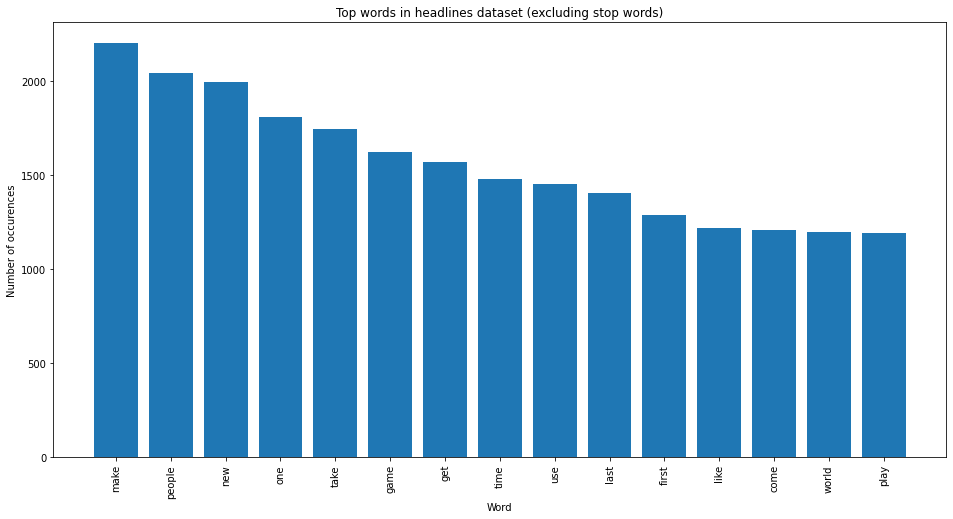

In [ ]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=news_df['filtered'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

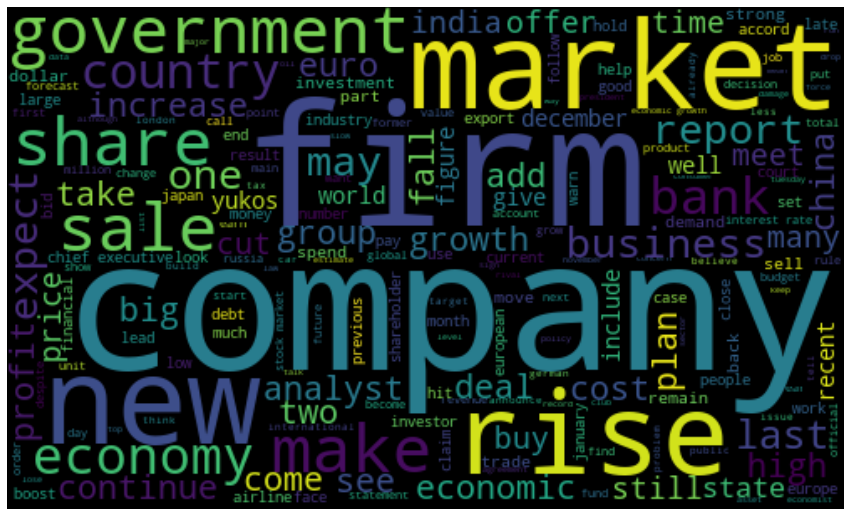

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='business']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

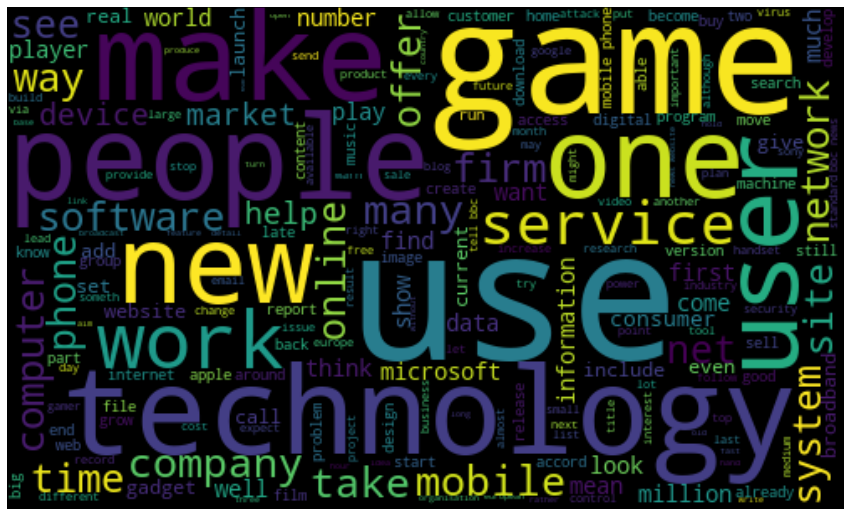

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='tech']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

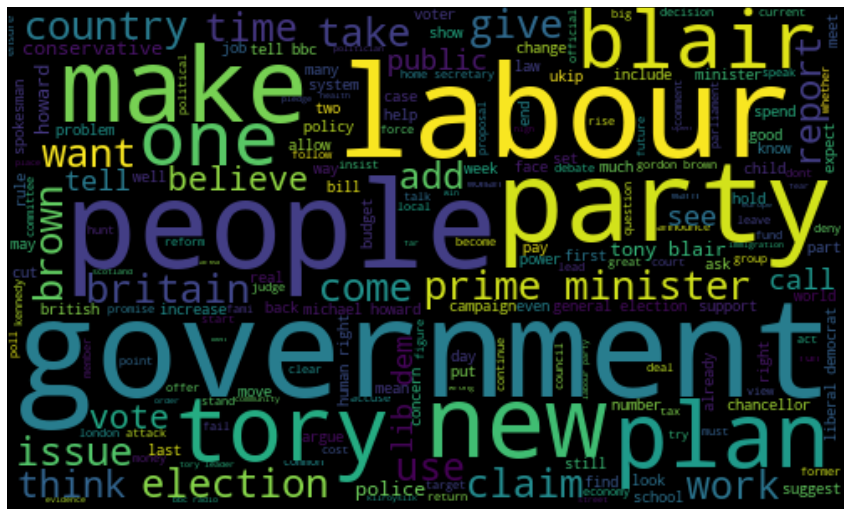

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='politics']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

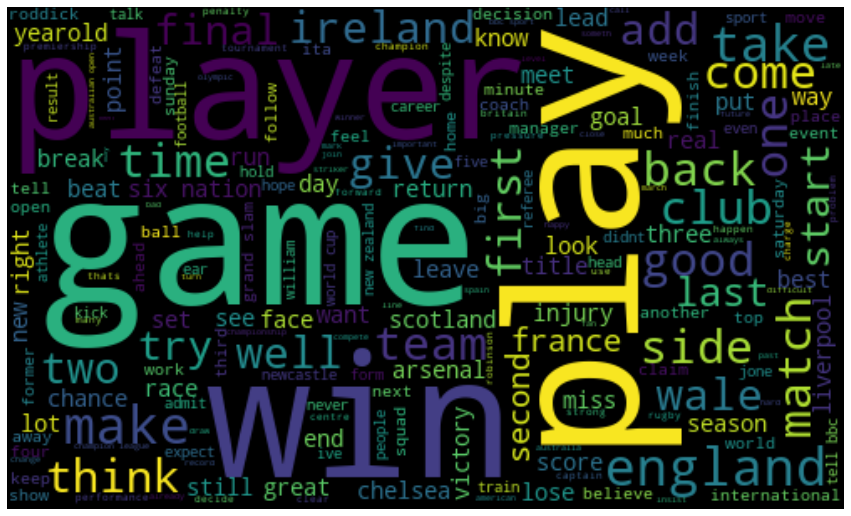

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='sport']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

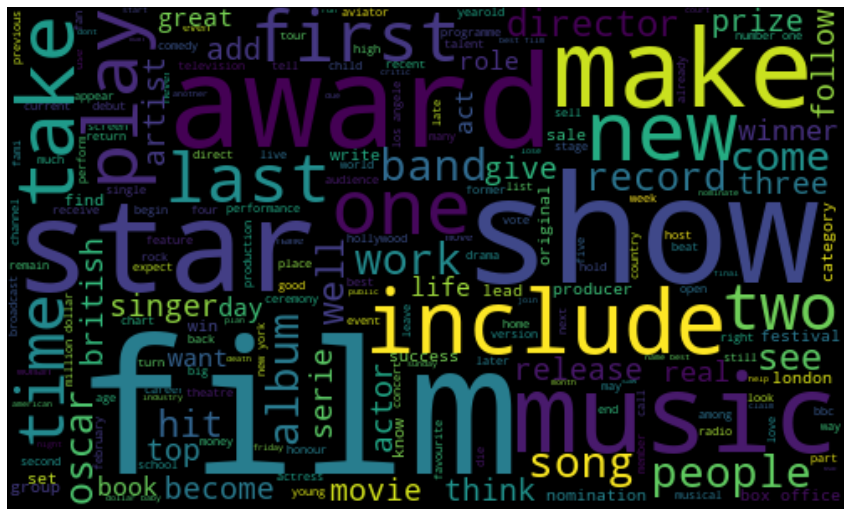

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in news_df[news_df['type']=='entertainment']['filtered']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000,min_df=0.1)
matrix=vectorizer.fit_transform(news_df['filtered'])
df1 = pd.DataFrame(matrix.todense() , columns=vectorizer.get_feature_names())

In [ ]:
df1.head()

,able,accord,action,add,ahead,allow,already,although,analyst,announce,another,around,ask,away,back,bbc,become,begin,believe,best,big,britain,british,business,buy,call,case,chance,change,chief,claim,clear,close,come,company,concern,continue,control,cost,country,...,side,since,six,spend,spokesman,star,start,state,still,strong,suggest,support,system,take,talk,team,technology,tell,think,third,three,time,top,try,turn,two,use,want,warn,way,website,week,well,whether,win,without,work,world,yearold,yet
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.147072,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.149378,0.146233,0.000000,0.0,0.000000,0.513518,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.132819,0.000000,0.162145,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.167676,0.0,0.116302,0.000000,0.0,0.000000,0.000000,0.000000,0.148213,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.102817,0.000000,0.094880,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.288063,0.000000,0.084814,0.0,0.0,0.089368,0.000000,0.000000,0.000000,0.0,0.064638,0.155869,0.101538,0.000000,0.0,0.000000,0.085568,...,0.0,0.000000,0.094174,0.000000,0.0,0.0,0.0,0.097868,0.081491,0.000000,0.00000,0.0,0.0,0.0,0.101288,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.061391,0.088106,0.000000,0.0,0.000000,0.0,0.072883,0.0,0.074951,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.355182,0.0,0.0
2,0.0,0.072162,0.0,0.000000,0.000000,0.0,0.069492,0.0,0.000000,0.000000,0.073691,0.147698,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121226,0.0,0.0,0.298949,0.078934,0.132029,0.0,0.0,0.000000,0.282328,0.000000,0.076526,0.0,0.000000,0.424619,0.079031,0.000000,0.0,0.074737,0.133202,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.076175,0.000000,0.000000,0.24383,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.059472,0.047783,0.000000,0.000000,0.0,0.050095,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.056688,0.165872,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.170739,0.0,0.000000,0.0,0.081443,0.000000,0.000000,0.000000,0.0,0.0,0.057854,0.0,0.000000,0.000000,0.0,0.073306,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.220351,0.000000,0.000000,0.0,0.052355,0.063125,0.082243,0.072665,0.0,0.000000,0.000000,...,0.0,0.065308,0.000000,0.000000,0.0,0.0,0.0,0.158542,0.000000,0.154869,0.08458,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.061383,0.0,0.123778,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.17098,0.084469,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.128667,0.0,0.096161,0.146271,0.0,0.000000,0.0,0.139544,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.239862,0.141616,0.0,0.000000,0.108074,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.124025,0.000000,0.000000,0.000000,0.0,0.179410,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.111898,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.132676,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.122273,0.000000,0.0,0.089321,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.098585,0.0,0.0


In [ ]:
model=LatentDirichletAllocation(n_components=5)
model.fit(matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(model,matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  32.398129
0       51.163364 -159.968018       2        1  22.658173
2      -73.144554   21.523815       3        1  20.953613
1      -66.410133 -110.606438       4        1  13.793438
4       54.417324   12.443444       5        1  10.196647, topic_info=        Term        Freq       Total Category  logprob  loglift
65      film  107.000000  107.000000  Default  30.0000  30.0000
76      game  107.000000  107.000000  Default  29.0000  29.0000
199     star   61.000000   61.000000  Default  28.0000  28.0000
85    growth   51.000000   51.000000  Default  27.0000  27.0000
183     rise   62.000000   62.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
47   despite    7.853470   33.380696   Topic5  -4.9915   0.8361
192    share   11.858600   55.043999   Topic5  -4.5794   0.7480
176   record   10.957218   56.370904   Topic5  -4.6584   0.6452
179   report   10.781889   66.685107   Topic5  -4.6745   0.4610
108     last   11.076781   89.017440   Topic5  -4.6476   0.1991

[228 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         1  0.546763   accord
1         2  0.027338   accord
1         3  0.082015   accord
1         4  0.136691   accord
1         5  0.191367   accord
...     ...       ...      ...
231       5  0.072505    world
232       1  0.027287  yearold
232       2  0.654892  yearold
232       3  0.054574  yearold
232       4  0.245584  yearold

[761 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

In [ ]:
bivectorizer = CountVectorizer(min_df=10, max_df=0.9, ngram_range=(2,2))
bigram_vectorized = bivectorizer.fit_transform(news_df['filtered'])
df2= pd.DataFrame(bigram_vectorized.todense() , columns=bivectorizer.get_feature_names())

In [ ]:
df2.head()

,able get,academy award,accord analyst,accord figure,accord recent,accord report,accord research,achievement award,across country,across europe,across world,act best,action take,add government,affair committee,affair spokesman,agree pay,alan milburn,alastair campbell,album release,alex ferguson,alicia key,allow people,allow user,already make,amount money,analyst believe,analyst expect,analyst forecast,analyst gartner,analyst jupiter,analyst predict,andre agassi,andy robinson,andy roddick,announce plan,annual rate,answer question,antidop agency,antivirus firm,...,win best,win election,win england,win first,win game,win next,win six,win third,win two,winner include,without charge,without trial,work close,work hard,work pension,work real,work together,work well,world bank,world big,world champion,world cross,world cup,world first,world indoor,world large,world lead,world number,world poor,world record,world service,world tour,world trade,world war,write direct,yet make,young people,young player,youve get,yukos claim
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
bi_lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online',verbose=True)
data_bi_lda = bi_lda.fit_transform(bigram_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
bi_dash = pyLDAvis.sklearn.prepare(bi_lda, bigram_vectorized, bivectorizer, mds='tsne')
bi_dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  24.734267
2       51.163364 -159.968018       2        1  21.527665
4      -73.144554   21.523815       3        1  20.947871
1      -66.410133 -110.606438       4        1  20.011720
0       54.417324   12.443444       5        1  12.778477, topic_info=                  Term        Freq       Total Category  logprob  loglift
968     prime minister  308.000000  308.000000  Default  30.0000  30.0000
748       mobile phone  183.000000  183.000000  Default  29.0000  29.0000
1106        six nation  164.000000  164.000000  Default  28.0000  28.0000
1230        tony blair  180.000000  180.000000  Default  27.0000  27.0000
420   general election  172.000000  172.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
735     million people   26.054931   64.524794   Topic5  -5.0039   1.1506
1169        take place   25.964975   95.134417   Topic5  -5.0073   0.7589
339      film festival   21.286460   35.231385   Topic5  -5.2060   1.5535
827         number one   23.326391  132.477343   Topic5  -5.1145   0.3206
910        people want   20.946817   41.164428   Topic5  -5.2221   1.3818

[251 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
20        3  0.957980    alex ferguson
22        3  0.968313     allow people
30        5  0.961254  analyst jupiter
33        2  0.962867    andy robinson
39        3  0.958851   antivirus firm
...     ...       ...              ...
1351      2  0.976129     world record
1352      3  0.965589    world service
1353      5  0.979397       world tour
1358      1  0.227478     young people
1358      3  0.758260     young people

[320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

In [ ]:
svd_2d = TruncatedSVD(n_components=5)
data_2d = svd_2d.fit_transform(matrix)

In [ ]:
trivectorizer = CountVectorizer(min_df=9, max_df=0.9, ngram_range=(2,3))
trigram_vectorized = trivectorizer.fit_transform(news_df['filtered'])
df3= pd.DataFrame(trigram_vectorized.todense() , columns=trivectorizer.get_feature_names())

In [ ]:
df3.head()

,able get,able play,academy award,accord analyst,accord figure,accord recent,accord report,accord research,achievement award,across country,across europe,across world,act best,action take,actor award,add government,affair committee,affair spokesman,affair spokesman mark,agency report,agree buy,agree pay,aid agency,alan milburn,alastair campbell,album release,alex ferguson,alicia key,allow people,allow user,almost million,almost three,already make,already use,ambition founder,ambition founder mikhail,american life,amount data,amount money,analyst believe,...,work make,work one,work pension,work real,work together,work well,worker union,world bank,world big,world champion,world cross,world cross country,world cup,world cup winner,world first,world indoor,world large,world lead,world number,world number one,world poor,world record,world service,world service programme,world top,world tour,world trade,world trade organisation,world war,write direct,xbox game,yearold make,yet know,yet make,york marathon,york time,young people,young player,youve get,yukos claim
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tri_lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online',verbose=True)
data_tri_lda = tri_lda.fit_transform(trigram_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
tri_dash = pyLDAvis.sklearn.prepare(tri_lda, trigram_vectorized, trivectorizer, mds='tsne')
tri_dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  27.755649
1       51.163364 -159.968018       2        1  21.195325
4      -73.144554   21.523815       3        1  20.414159
2      -66.410133 -110.606438       4        1  15.364318
0       54.417324   12.443444       5        1  15.270549, topic_info=                  Term        Freq       Total Category  logprob  loglift
1322    prime minister  302.000000  302.000000  Default  30.0000  30.0000
1631          tell bbc  338.000000  338.000000  Default  29.0000  29.0000
101           bbc news  187.000000  187.000000  Default  28.0000  28.0000
1516        six nation  157.000000  157.000000  Default  27.0000  27.0000
1632     tell bbc news  156.000000  156.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
1165  olympic champion   30.089195   38.623958   Topic5  -5.2254   1.6295
838          last week   43.499506  180.909847   Topic5  -4.8568   0.4540
104            bbc one   29.851152   44.063748   Topic5  -5.2333   1.4898
525         first time   31.653358  128.678201   Topic5  -5.1747   0.4768
1605        take place   30.270698   96.411493   Topic5  -5.2194   0.7208

[248 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
2         5  0.990325     academy award
6         2  0.970458     accord report
26        3  0.972351     alex ferguson
47        4  0.967366     andy robinson
48        4  0.976224      andy roddick
...     ...       ...               ...
1852      4  0.984358      world number
1853      4  0.983981  world number one
1855      4  0.027247      world record
1855      5  0.953638      world record
1856      2  0.971920     world service

[303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])

In [ ]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  
data = news_df.filtered.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['healthsouth', 'exboss', 'trial', 'former', 'head', 'medical', 'service', 'firm', 'healthsouth', 'overstate', 'earnings', 'asset', 'boost', 'companys', 'share', 'price', 'claim', 'court', 'richard', 'scrushy', 'accuse', 'direct', 'accounting', 'fraud', 'company', 'cofounded', 'alabama', 'prosecutor', 'motivate', 'wealth']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 3), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 2), (45, 3), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 5), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)]]


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"game" + 0.012*"music" + 0.011*"player" + 0.009*"video" + '
  '0.008*"play" + 0.007*"one" + 0.007*"take" + 0.007*"film" + 0.006*"like" + '
  '0.006*"also"'),
 (1,
  '0.008*"game" + 0.007*"win" + 0.006*"play" + 0.006*"player" + 0.006*"world" '
  '+ 0.006*"england" + 0.005*"first" + 0.005*"team" + 0.005*"get" + '
  '0.005*"last"'),
 (2,
  '0.010*"blue" + 0.005*"genel" + 0.005*"metal" + 0.004*"donofrio" + '
  '0.004*"offer" + 0.004*"republic" + 0.004*"slug" + 0.004*"lion" + '
  '0.003*"supercomputing" + 0.003*"simulator"'),
 (3,
  '0.010*"people" + 0.009*"technology" + 0.009*"use" + 0.008*"user" + '
  '0.007*"service" + 0.007*"mobile" + 0.006*"site" + 0.006*"firm" + '
  '0.006*"phone" + 0.006*"computer"'),
 (4,
  '0.012*"people" + 0.008*"get" + 0.007*"make" + 0.006*"use" + 0.006*"message" '
  '+ 0.005*"way" + 0.005*"like" + 0.005*"think" + 0.004*"email" + '
  '0.004*"tell"')]


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4332543850771078
